In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython.display import display, clear_output

from helpers import (find_seam, 
                     rm_seam, 
                     duplicate_seam,
                     calc_energy_e1,
                     calc_cme
                     )

%matplotlib inline

(466, 700, 3)


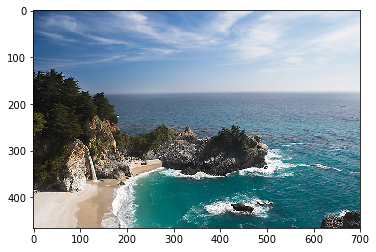

In [2]:
def imread(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imwrite(path, img):
    cv2.imwrite(path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

fig5 = imread("./images/fig5.png")
plt.imshow(fig5)
print(fig5.shape)

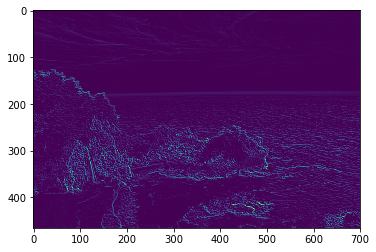

In [3]:
energy = calc_energy_e1(fig5)
energy_colored = cv2.applyColorMap(energy, cv2.COLORMAP_JET)
plt.imshow(energy_colored)

In [4]:
seam = find_seam(fig5)
print seam[:9]
print seam[-9:]

[(0, 0), (1, 1), (2, 1), (3, 0), (4, 1), (5, 1), (6, 0), (7, 0), (8, 1)]
[(457, 9), (458, 10), (459, 11), (460, 12), (461, 11), (462, 10), (463, 9), (464, 10), (465, 9)]


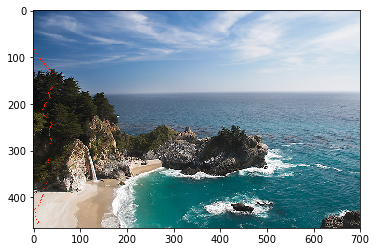

In [5]:
fig5_w_seam = fig5.copy()
for p in seam:
    fig5_w_seam[p] = [255,25,0]
plt.imshow(fig5_w_seam)

'Rm seam 341'

(466, 350, 3)
time: 251.640089989


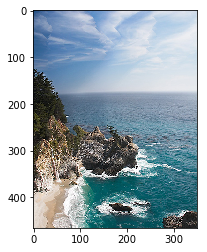

In [6]:
st = time.time()
fig5_narrow = fig5.copy()
for i in range(350):
    if i % 10 == 0:
        clear_output(wait=True)
        display('Rm seam '+str(i+1))
        imwrite("test_img/fig5_rm_{}.png".format(i), fig5_narrow)
        
#         energy = calc_energy_e1(fig5_narrow)
#         cme = calc_cme(energy)
#         plt.hist(cme[-1], bins=100)
#         plt.show()
    
    seam = find_seam(fig5_narrow)
    fig5_narrow = rm_seam(fig5_narrow, seam)
imwrite("test_img/fig5_rm_final.png", fig5_narrow)
plt.imshow(fig5_narrow)
print fig5_narrow.shape
print "time: " + str(time.time()-st)